# Working with .fits files

In [1]:
from astropy.io import fits

In [17]:
path = '/Volumes/CoveyData-1/APOGEE_Spectra/python_DR13/dr13/apogee/spectro/redux/r6/apo25m/5263/55845/apVisit-r6-5263-55845-070.fits'
#path = '/Users/ballanr/Desktop/SummerResearch/dr13/apogee/spectro/redux/r6/apo25m/7265/56671/apVisit-r6-7265-56671-047.fits'
hdulist = fits.open(path) 

In [18]:
hdu = hdulist[0]

In [19]:
hdu.header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2015-07-10'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
LOCID   =                 4119 /Location ID of field                            
PLATE   = '5263    '           /Plate ID                                        
TELESCOP= 'apo25m  '           /Telescope                                       
MJD5    =                55845 /MJD of observation                              
FIBERID =                   70 / APOGEE Fiber ID 1-300                          
DATE-OBS= '2011-10-11T06:08:

In [22]:
try:
    x = hdu.header['BC'] 
    print(x)
except KeyError:
    print('Yah')

Yah


In [ ]:
hdu.data[0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.scatter(hdu.data[0],hddu.data[0],s=.5);
#plt.xlim(16000,16900)
#plt.ylim(500,550)

In [ ]:
x = []
y = []

for i in range(len(hdu.data[2])):
    x.append(hdu.data[2][-i-1])
    y.append(hddu.data[2][-i-1])
for i in range(len(hdu.data[1])):
    x.append(hdu.data[1][-i-1])
    y.append(hddu.data[1][-i-1])
for i in range(len(hdu.data[0])):
    x.append(hdu.data[0][-i-1])
    y.append(hddu.data[0][-i-1])

In [ ]:
plt.scatter(x,y,s=.5);

In [ ]:
import numpy as np

In [ ]:
np.savetxt('/Users/ballanr/Desktop/test1.txt', np.c_[x,y],fmt='%.15f')   # x,y,z equal sized 1D arrays

In [ ]:
g,h = np.loadtxt('/Users/ballanr/Desktop/test1.txt',skiprows=1,usecols=(0,1),unpack=True)
plt.scatter(g,h,s=0.5)

In [ ]:
import pandas as pd

In [ ]:
sample = pd.Series(x)
sample1 = pd.Series(y)

In [ ]:
sample

In [ ]:
df = pd.DataFrame(sample,columns=['Wavelength'])
df

In [ ]:
df['Flux'] = y

In [ ]:
df

In [ ]:
df.to_csv('/Users/ballanr/Desktop/ohboy.csv',index=False)

In [ ]:
for index,row in df.iterrows():
    print(row['Wavelength'])

In [ ]:
plt.scatter(df['Wavelength'],df['Flux'],s=0.1);

# New Function

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%run ../Modules/Importing.py
from astropy.io import fits as fits

In [4]:
x = pd.read_csv('/Users/ballanr/Desktop/testcsvfile.csv')

In [8]:
cols = ['Location ID','2Mass ID', 'Plate ID','MJD','Fiber','Br 11 EqW','Br 12 EqW',
       'Br 13 EqW','Br 14 EqW','Br 15 EqW','Br 16 EqW','Br 17 EqW','Br 18 EqW',
       'Br 19 EqW','Br 20 EqW']
df = pd.DataFrame(columns = cols)

for index,row in x.iterrows():
    
    loc = row['Location ID']
    twomass = row['2Mass ID']
    plateid = row['Plate']
    mjd = row['MJD']
    if len(str(row['Fiber'])) == 3:
        fiber = str(row['Fiber'])
    elif len(str(row['Fiber'])) == 2:
        fiber = '0' + str(row['Fiber']) 
    else:
        fiber = '00' + str(row['Fiber'])
        
    fitsfile = f.File_Path(plateid,mjd,fiber)
    
    #this passes a filepath that astropy can open with fits, circumventing apogee entirely...
    
    openfile = fits.open(fitsfile)
    vbc = openfile[0].header['BC']
    
    fspec = openfile[1]
    fwave = openfile[4]
    wave = []
    flux = []
    
    for i in range(len(fwave.data[2])):
        wave.append(fwave.data[2][-i-1])
        flux.append(fspec.data[2][-i-1])
    for i in range(len(fwave.data[1])):
        wave.append(fwave.data[1][-i-1])
        flux.append(fspec.data[1][-i-1])
    for i in range(len(fwave.data[0])):
        wave.append(fwave.data[0][-i-1])
        flux.append(fspec.data[0][-i-1])
        
    newflux = OH_Skylines_Remover(wave,flux)
    
    #now we run equiv width calc
    lines = [11,12,13,14,15,16,17,18,19,20]
    EqW = []
    equiv_check = 1000
    
    for i in range(10):
        
        equiv_width,fcontinuum,shift = f.Br_EqW(wave,newflux,line[i],vbc)
        EqW.append(equiv_width)
        
        if i == 0:
            equiv_check = equiv_width
        
    wave = np.asarray(wave) + shift #check which direction shift is going
    
    if equiv_check > 0:
        
        df2 = pd.DataFrame([loc,twomass,plateid,mjd,fiber,EqW[0],EqW[1],EqW[2],EqW[3],
                           EqW[4],EqW[5],EqW[6],EqW[7],EqW[8],EqW[9]],columns = cols)
        df.append(df2)
        
        df1 = pd.DataFrame(wave,columns=['Wavelength'])
        df1['Flux'] = newflux
        df1.to_csv('SOMEWHERE') #figure out filepathing
df.to_csv('SOMEWHERE')#figure out filepathing

In [ ]:
def Br_EqW(wave,spec,line,vbc):
    
    import functions
    import numpy as np
    
    observed_wavelength,shift,rest_wavelength = functions.Barycentric_Correction(line,vbc)
    
    centerline = functions.find_nearest(wave,observed_wavelength)
    
    L1 = centerline - 240 # ~ 56 Angstroms
    L2 = centerline - 151 # ~ 35 Angstroms
    R1 = centerline + 150
    R2 = centerline + 241

    Fluxcontinuum = (np.sum(spec[L1:L2])+np.sum(spec[R1:R2])) / (len(spec[L1:L2])+len(spec[R1:R2]))
    EqW1 = 0

    if Fluxcontinuum == 0:

        EqW1 = 0
        EqW1_rounded = 0

    if Fluxcontinuum != 0:

        for i in range(L2,centerline):

            left_area = (wave[i+1]-wave[i])*(spec[i+1]-Fluxcontinuum)-(1./2.)*(wave[i+1]-wave[i])*(spec[i+1]-spec[i])
            EqW1 += left_area

        for i in range(centerline,R1):

            right_area = (wave[i+1]-wave[i])*(spec[i]-Fluxcontinuum)-(1./2.)*(wave[i+1]-wave[i])*(spec[i]-spec[i+1])
            EqW1 += right_area

        #EqW_rounded = round(EqW1/Fluxcontinuum,5)
        EqW = EqW1/Fluxcontinuum
    
    return EqW,Fluxcontinuum,shift

In [ ]:
def OH_Skylines_Remover(wave,flux):
    
    import functions
    
    OH_Lines = [15187.14,15240.954,15287.789,15332.402,15430.163,15432.156,15462.125,15474.212,
                15539.711,15540.945,15546.141,15570.159,15597.631,15702.539,15862.489,15869.307,
                15890.033,15897.211,16079.753,16128.608,16388.492,16414.737,16802.368,16840.481]
    
    windows = []
    
    for i in range(len(OH_Lines)):
        
        lwindow = f.find_nearest(wave,OH_Lines[i]-1.5)
        rwindow = f.find_nearest(wave,OH_Lines[i]+1.5)
        
        windows.append((lwindow,rwindow))
    
    for i in range(len(windows)):
        
        if i != 4 and i != 5 and i != 8 and i != 9:
            
            lwindowelement = int(windows[i][0])
            leftwindow = wave[windows[i][0]]
            rightwindow = wave[windows[i][1]]
            leftflux = spec[windows[i][0]]
            rightflux = spec[windows[i][1]]
        
            slope = (rightflux - leftflux) / (rightwindow - leftwindow)
        
            for k in range(rightwindow - leftwindow):
                fluxvalue = slope*(wave[lwindowelement+k] - leftwindow) + leftflux
                flux[lwindowelement+k] = fluxvalue
        
        elif i == 4:
            
            lwindowelement = int(windows[i][0])
            leftwindow = wave[windows[i][0]]
            rightwindow = wave[windows[i+1][1]]
            leftflux = spec[windows[i][0]]
            rightflux = spec[windows[i+1][1]]
        
            slope = (rightflux - leftflux) / (rightwindow - leftwindow)
        
            for k in range(rightwindow - leftwindow):
                fluxvalue = slope*(wave[lwindowelement+k] - leftwindow) + leftflux
                flux[lwindowelement+k] = fluxvalue
                
        elif i == 8:
            
            lwindowelement = int(windows[i][0])
            leftwindow = wave[windows[i][0]]
            rightwindow = wave[windows[i+1][1]]
            leftflux = spec[windows[i][0]]
            rightflux = spec[windows[i+1][1]]
        
            slope = (rightflux - leftflux) / (rightwindow - leftwindow)
        
            for k in range(rightwindow - leftwindow):
                
                fluxvalue = slope*(wave[lwindowelement+k] - leftwindow) + leftflux
                flux[lwindowelement+k] = fluxvalue
                
    return flux

In [19]:
import numpy as np

In [30]:
wave = np.array([1,2,3,4,5])
bananas = np.array([4,2,6,8,1])

In [33]:
df = pd.DataFrame(wave,columns=['Wavelength'])

In [35]:
df['Bananas'] = bananas

In [36]:
df

,Wavelength,Bananas
0,1,4
1,2,2
2,3,6
3,4,8
4,5,1


In [40]:
df = pd.DataFrame(columns = ['Location ID','2Mass ID', 'Plate ID','MJD','Fiber','Br 11 EqW',
                                 'Br 12 EqW','Br 13 EqW','Br 14 EqW','Br 15 EqW','Br 16 EqW',
                                 'Br 17 EqW','Br 18 EqW','Br 19 EqW','Br 20 EqW'])

In [41]:
df

,Location ID,2Mass ID,Plate ID,MJD,Fiber,Br 11 EqW,Br 12 EqW,Br 13 EqW,Br 14 EqW,Br 15 EqW,Br 16 EqW,Br 17 EqW,Br 18 EqW,Br 19 EqW,Br 20 EqW


# End

In [43]:
vbc = 5
c = 299792
dellam = vbc/c
dellam

1.667823023963281e-05

In [44]:
wave = np.array([1,2,3,4,5])
bananas = np.array([4,2,6,8,1])

In [45]:
wave = wave*0.5
wave

array([ 0.5,  1. ,  1.5,  2. ,  2.5])

In [75]:
a = []
b = [1,2,3,4,5,6,7,8,9,10]
for i in range(10):
    a.append(b[i])
a = np.asarray(a)

In [76]:
a.shape

(10,)

In [89]:
loc = '/Users/ballanr/Desktop/SummerResearch/T-Tauri/Modules/Visits.csv'
x = pd.read_csv(loc,delimiter = '\t')
x

,Location ID,2Mass ID,Plate,MJD,Fiber
0,4102,2M21353892+4229507,5254,55870,16
1,4102,2M21353892+4229507,5254,56170,21
2,4102,2M21353892+4229507,5254,56193,15
3,4102,2M21354457+4235157,6249,56206,23
4,4102,2M21354457+4235157,6249,56223,17
5,4102,2M21354457+4235157,6249,56232,14
6,4102,2M21354474+4250256,5254,55870,215
7,4102,2M21354474+4250256,5254,56170,215
8,4102,2M21354474+4250256,5254,56193,212
9,4102,2M21354474+4250256,5255,55869,212


In [94]:
for index,row in x.iterrows():
    print(row['Location ID'])

4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102
4102


KeyboardInterrupt: 

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
filename = '5675-56459-040'

In [13]:
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/11000/'+filename+'.csv',index_col=False)
x = g['Wavelength']
y = g['Flux']

(16770.009560400827, 16849.973663919016)

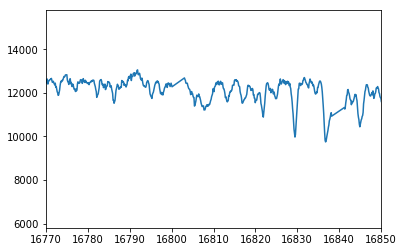

In [23]:
plt.plot(x,y);
plt.xlim(x[10629],x[11333])

In [ ]:
from numpy import abs

In [22]:
index = (abs(x-16850)).argmin()
index

11333

In [21]:
x[10629]

16770.009560400827

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

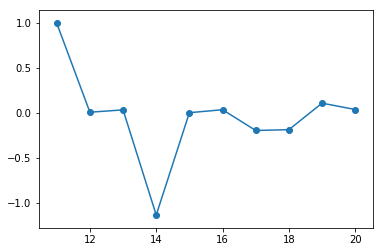

In [21]:
y = np.array([23.9384085,0.202006061,0.824455113,-27.19259649,0.078218246,
              0.86465173,-4.660250997,-4.451124301,2.616324336,0.923903279])
y = y/y[0]
x = np.arange(11,21,1)
plt.plot(x,y);
plt.scatter(x,y);

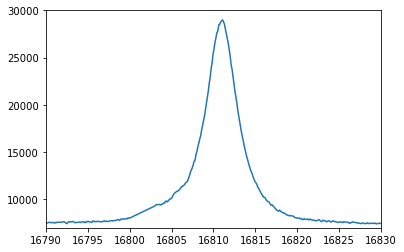

In [52]:
filename = str(7200) + '-' + str(56674) + '-' + str(208) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(7000,30000);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');

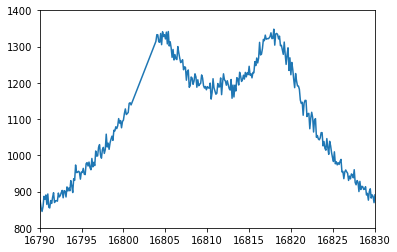

In [54]:
filename = str(7194) + '-' + str(56646) + '-' + str(161) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(800,1400);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');

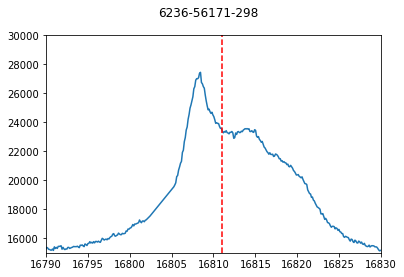

In [60]:
filename = str(6236) + '-' + str(56171) + '-' + str(298) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(15000,30000);
plt.axvline(16811,ls='dashed',color='red');
#plt.axhline(100,color='black');
plt.suptitle('6236-56171-298')
plt.savefig('/Users/ballanr/Desktop/6236-56171-298.jpg',dpi=300)

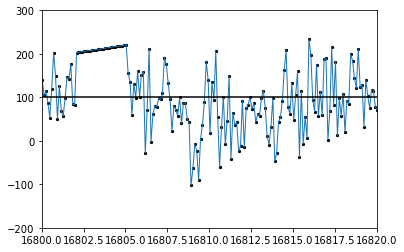

In [75]:
filename = str(5645) + '-' + str(55967) + '-' + str(149) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1,linewidth=1);
plt.scatter(x1,y1,color='black',s=5)
plt.xlim(16800,16820);
plt.ylim(-200,300);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');